#  EDUNET FOUNDATION-Class Exercise Notebook

# Lab 28 Implementing RNN Classifier 

## Create an RNN classifier Model

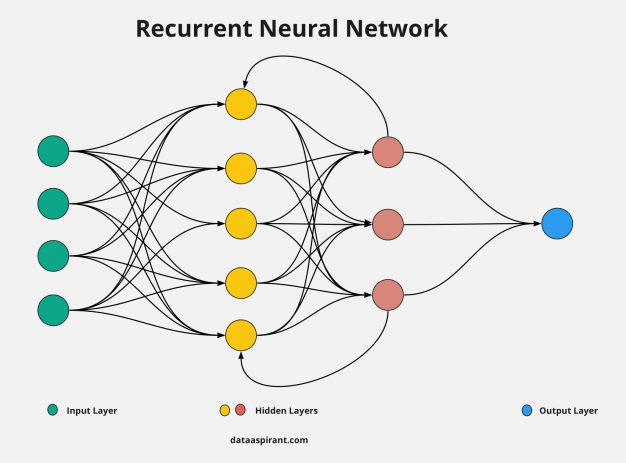

Recurrent Neural Networks(RNN) are a type of Neural Network where the output from the previous step is fed as input to the current step.

RNN’s are mainly used for,

Sequence Classification — Sentiment Classification & Video Classification

Sequence Labelling — Part of speech tagging & Named entity recognition

Sequence Generation — Machine translation & Transliteration

## Import necessary libraries 

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)

## Load dataset and divide it into training and testnig

In [2]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

## Prepreocessing text data

In [3]:

# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

## Create an RNN model and train

In [ ]:

# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               13300     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 173,401
Trainable params: 173,401
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
391/391 [==============================] - 142s 358ms/step - loss: 0.6287 - accuracy: 0.6222 - val_loss: 0.9801 - val_accuracy: 0.5995
Epoch 2/3
391/391 [==============================] - 136s 348ms/step - loss: 0.4670 - accuracy: 0.7839 - val_loss: 0.4270 - val_accuracy: 0.8135
Epoch 3/3
388/391 [

## Print the results

In [ ]:

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))